In [1]:
import pandas as pd
import numpy as np
import libpysal as lp
import rasterio as rio
import geopandas as gpd
import contextily as ctx
import shapely.geometry as geom
import matplotlib.pyplot as plt

In [2]:
df = gpd.read_file('data/berlin-districts.geojson')

In [3]:
df.head()

,district,district_group,median_price,geometry
0,Blankenfelde/Niederschönhausen,Pankow,37.5,(POLYGON ((1493006.880445722 6912074.798336806...
1,Helmholtzplatz,Pankow,58.0,"(POLYGON ((1493245.549433984 6900059.69597819,..."
2,Wiesbadener Straße,Charlottenburg-Wilm.,50.0,"(POLYGON ((1481381.45206371 6885170.697768607,..."
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,99.0,(POLYGON ((1526159.828554794 6872101.043604896...
4,Müggelheim,Treptow - Köpenick,25.0,(POLYGON ((1529265.085750472 6874326.842288786...


In [4]:
import seaborn as sbn

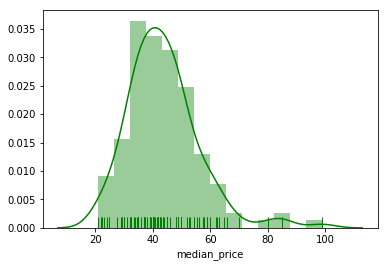

In [5]:
sbn.distplot(df['median_price'], color='g', rug=True);

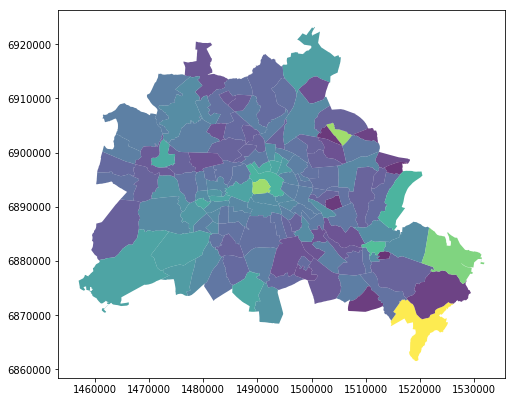

In [6]:
df.plot(column='median_price', figsize=(8,8), alpha=.8);

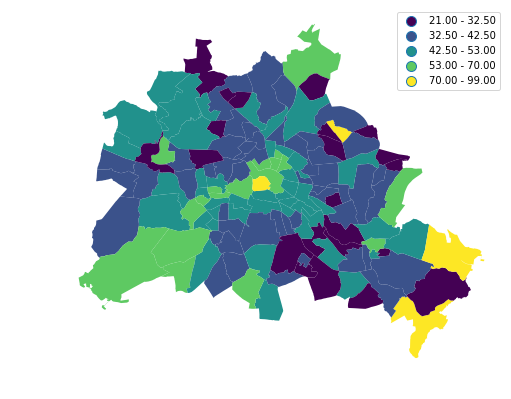

In [7]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'aspect':'equal'})
df.plot(ax=ax, column='median_price', k=5, scheme='Fisher_Jenks', legend=True); 
# 'Quantiles','Equal_Interval', 'Fisher_Jenks', 'Fisher_Jenks_Sampled'
ax.set_axis_off();

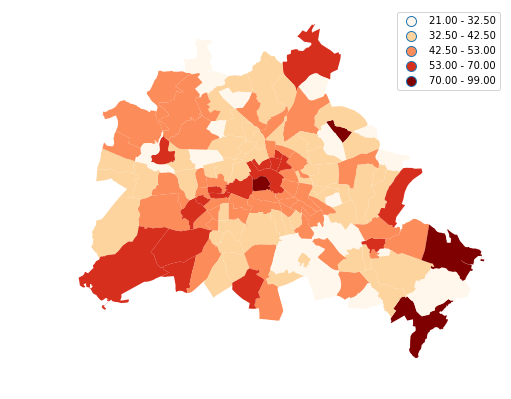

In [8]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'aspect':'equal'})
df.plot(ax=ax, column='median_price', k=5, scheme='Fisher_Jenks', cmap='OrRd', legend=True)
ax.set_axis_off();

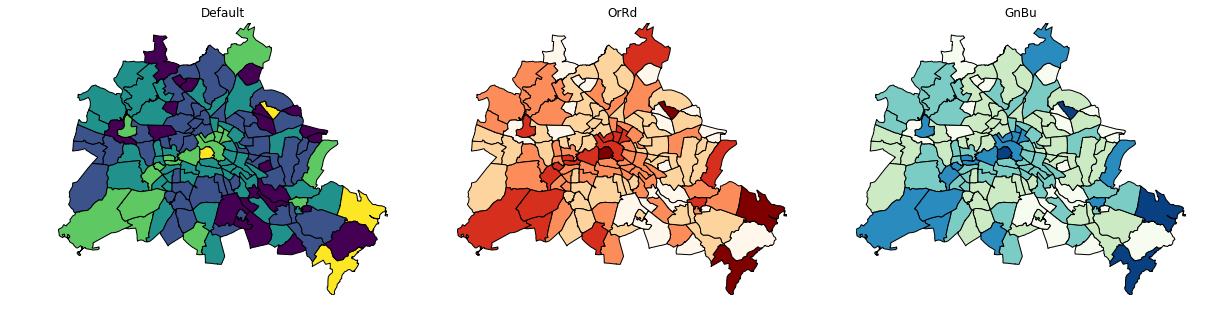

In [9]:
fig, ax = plt.subplots(1,3, figsize=(4.5*4.5,5), subplot_kw=dict(aspect='equal'))

df.plot(column='median_price', ax=ax[0], edgecolor='k', scheme='Fisher_Jenks', k=5)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title('Default')

df.plot(column='median_price', ax=ax[1], edgecolor='k', scheme='Fisher_Jenks', cmap='OrRd', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title('OrRd')

df.plot(column='median_price', ax=ax[2], edgecolor='k', scheme='Fisher_Jenks', cmap='GnBu', k=5)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title('GnBu')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off');

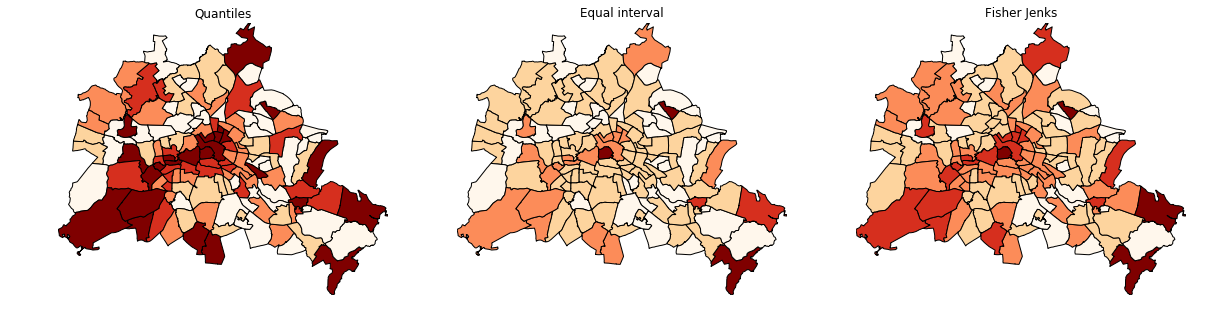

In [10]:
fig, ax = plt.subplots(1,3, figsize=(4.5*4.5,5), subplot_kw=dict(aspect='equal'))

df.plot(column='median_price', ax=ax[0], edgecolor='k', scheme='Quantiles', cmap='OrRd', k=5)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title('Quantiles')

df.plot(column='median_price', ax=ax[1], edgecolor='k', scheme='equal_interval', cmap='OrRd', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title('Equal interval')

df.plot(column='median_price', ax=ax[2], edgecolor='k', scheme='Fisher_Jenks', cmap='OrRd', k=5)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title('Fisher Jenks')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off');

In [11]:
import mapclassify as mc

In [12]:
mc.CLASSIFIERS

('Box_Plot',
 'Equal_Interval',
 'Fisher_Jenks',
 'Fisher_Jenks_Sampled',
 'HeadTail_Breaks',
 'Jenks_Caspall',
 'Jenks_Caspall_Forced',
 'Jenks_Caspall_Sampled',
 'Max_P_Classifier',
 'Maximum_Breaks',
 'Natural_Breaks',
 'Quantiles',
 'Percentiles',
 'Std_Mean',
 'User_Defined')

In [13]:
y = df['median_price']
ea5 = mc.Equal_Interval(y, k=5)
ea5

             Equal Interval             
 
Lower            Upper             Count
         x[i] <= 36.600               40
36.600 < x[i] <= 52.200               74
52.200 < x[i] <= 67.800               19
67.800 < x[i] <= 83.400                2
83.400 < x[i] <= 99.000                3

In [14]:
ea5.yb

array([1, 2, 1, 4, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0,
       1, 4, 1, 0, 0, 1, 1, 1, 0, 3, 1, 1, 0, 1, 3, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2,
       4, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 0, 1, 0])

In [15]:
q5 = mc.Quantiles(y, k=5)
q5

               Quantiles                
 
Lower            Upper             Count
         x[i] <= 35.000               39
35.000 < x[i] <= 40.000               23
40.000 < x[i] <= 45.000               29
45.000 < x[i] <= 50.000               22
50.000 < x[i] <= 99.000               25

In [16]:
q5.yb

array([1, 4, 3, 4, 0, 0, 0, 3, 2, 4, 1, 3, 1, 4, 4, 1, 0, 2, 0, 3, 3, 3,
       3, 1, 0, 2, 3, 2, 1, 2, 0, 0, 3, 2, 0, 2, 4, 4, 4, 2, 3, 2, 3, 3,
       2, 1, 1, 3, 2, 2, 0, 0, 0, 0, 4, 3, 4, 4, 4, 1, 2, 2, 0, 2, 0, 0,
       2, 4, 2, 0, 1, 3, 1, 3, 0, 4, 2, 3, 0, 3, 4, 1, 3, 0, 0, 0, 0, 1,
       1, 2, 2, 0, 3, 0, 4, 4, 2, 4, 1, 0, 4, 3, 4, 0, 2, 2, 4, 1, 0, 4,
       4, 2, 2, 0, 1, 2, 3, 2, 1, 1, 2, 4, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       0, 0, 4, 0, 1, 0])

In [17]:
q5 = mc.Quantiles(y, k=5)
ei5 = mc.Equal_Interval(y, k=5)
mb5 = mc.Maximum_Breaks(y, k=5)
fj5 = mc.Fisher_Jenks(y, k=5)
fits = [c.adcm for c in [q5, ei5, mb5, fj5]]
fits

[403.67, 492.83, 1045.83, 368.83]

In [18]:
ht = mc.HeadTail_Breaks(y)
ht

            HeadTail_Breaks             
 
Lower            Upper             Count
         x[i] <= 43.767               74
43.767 < x[i] <= 53.654               42
53.654 < x[i] <= 64.932               15
64.932 < x[i] <= 78.571                3
78.571 < x[i] <= 87.250                3
87.250 < x[i] <= 99.000                1

In [19]:
std = mc.Std_Mean(y)
std

                 Std_Mean                
 
Lower            Upper              Count
         x[i] <= 18.771                 0
18.771 < x[i] <= 31.269                17
31.269 < x[i] <= 56.265               103
56.265 < x[i] <= 68.763                13
68.763 < x[i] <= 99.000                 5

In [20]:
bp = mc.Box_Plot(y)
bp

                Box Plot                
 
Lower            Upper             Count
         x[i] <= 12.500                0
12.500 < x[i] <= 35.000               39
35.000 < x[i] <= 42.000               31
42.000 < x[i] <= 50.000               43
50.000 < x[i] <= 72.500               21
72.500 < x[i] <= 99.000                4

In [21]:
bp.yb

array([2, 4, 3, 5, 1, 1, 1, 3, 2, 4, 2, 3, 2, 4, 4, 2, 1, 2, 1, 3, 3, 3,
       3, 2, 1, 2, 3, 3, 2, 3, 1, 1, 3, 3, 1, 3, 4, 4, 4, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 3, 1, 1, 1, 1, 4, 3, 4, 4, 4, 2, 3, 3, 1, 3, 1, 1,
       2, 5, 3, 1, 2, 3, 2, 3, 1, 4, 3, 3, 1, 3, 5, 2, 3, 1, 1, 1, 1, 2,
       2, 2, 3, 1, 3, 1, 4, 4, 3, 4, 2, 1, 4, 3, 4, 1, 3, 3, 4, 2, 1, 4,
       5, 3, 3, 1, 2, 2, 3, 3, 2, 2, 3, 4, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1,
       1, 1, 4, 1, 2, 1])

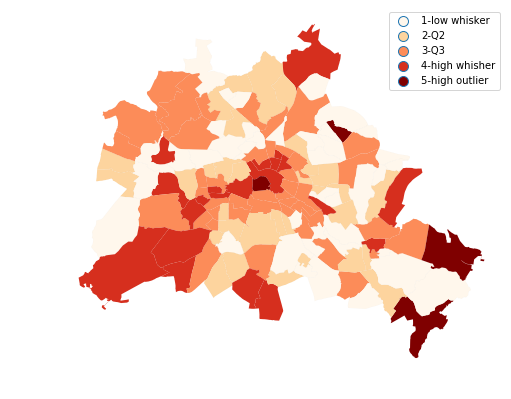

In [57]:
labels = ['0-low outlier', '1-low whisker', '2-Q2', '3-Q3', '4-high whisher', '5-high outlier']

bpl = [labels[b] for b in bp.yb]

fig, ax = plt.subplots(1, figsize=(8,8))
df.assign(cl=bpl).plot(column='cl', categorical=True, k=4, cmap='OrRd', linewidth=.01, ax=ax, edgecolor='grey', legend=True)
ax.set_axis_off();

## Spatilal Autocorrelation

In [23]:
wq = lp.weights.Queen.from_dataframe(df)
wq.transform = 'r'

In [24]:
ylag = lp.weights.lag_spatial(wq, y)
ylag

array([45.2       , 52.625     , 45.75      , 32.5       , 63.5       ,
       42.        , 45.625     , 44.14285714, 43.33333333, 38.75      ,
       41.5       , 50.8       , 36.6875    , 54.36363636, 54.375     ,
       38.92857143, 38.125     , 50.9       , 35.6875    , 59.66666667,
       46.875     , 46.92857143, 49.58333333, 47.25      , 53.25      ,
       40.57142857, 37.66666667, 37.14285714, 40.75      , 41.5       ,
       45.9       , 35.3       , 47.9375    , 47.33333333, 40.        ,
       44.        , 58.3       , 53.16666667, 42.166     , 43.75      ,
       51.625     , 52.3       , 50.5       , 46.91666667, 47.        ,
       38.125     , 35.33333333, 48.83333333, 46.6       , 43.125     ,
       40.805     , 41.33333333, 42.        , 45.7075    , 55.66666667,
       46.2       , 47.33333333, 50.47875   , 49.2075    , 42.92857143,
       43.4       , 40.78571429, 37.42857143, 32.75      , 45.57142857,
       51.25      , 44.        , 33.33333333, 33.25      , 42.  

In [25]:
ylag_q5 = mc.Quantiles(ylag, k=5)
ylag_q5

               Quantiles                
 
Lower            Upper             Count
         x[i] <= 38.125               29
38.125 < x[i] <= 40.891               26
40.891 < x[i] <= 44.105               28
44.105 < x[i] <= 48.662               27
48.662 < x[i] <= 63.500               28

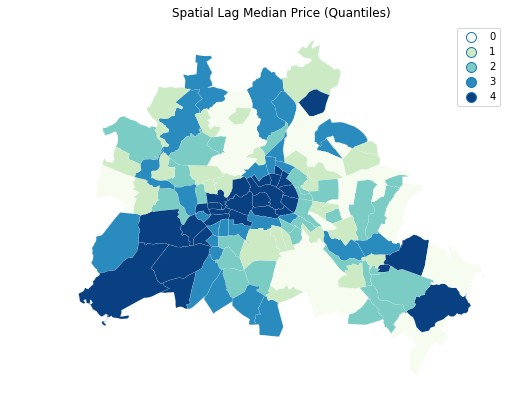

In [41]:
fig, ax = plt.subplots(1, figsize=(8,8), subplot_kw=dict(aspect='equal'))
df.assign(c1=ylag_q5.yb).plot(column='c1', categorical=True, k=4, cmap='GnBu', linewidth=.1, edgecolor='white', legend=True, ax=ax)
ax.set_axis_off()
plt.title('Spatial Lag Median Price (Quantiles)');

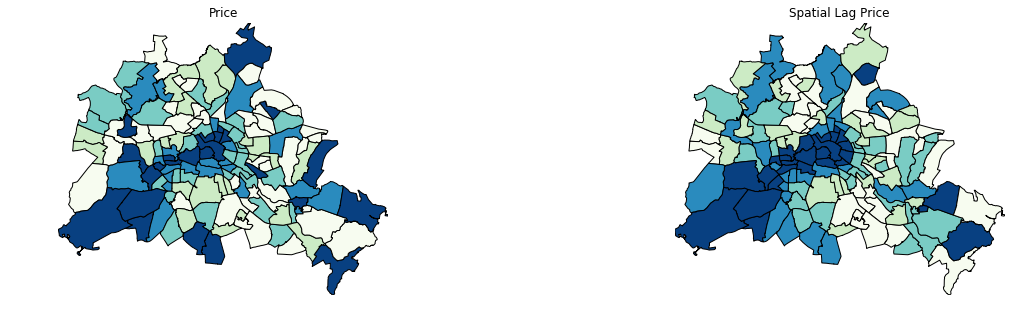

In [27]:
df['lag_median_price'] = ylag

fig, ax = plt.subplots(1,2, figsize=(4.5*4.5,5), subplot_kw=dict(aspect='equal'))

df.plot(column='median_price', ax=ax[0], edgecolor='k', scheme='Quantiles', cmap='GnBu', k=5)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title('Price')

df.plot(column='lag_median_price', ax=ax[1], edgecolor='k', scheme='Quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title('Spatial Lag Price')


ax[0].axis('off')
ax[1].axis('off');

In [28]:
y.median()

42.0

In [40]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in yb]
df['yb'] = yb
df.head()

,district,district_group,median_price,geometry,lag_median_price,yb
0,Blankenfelde/Niederschönhausen,Pankow,37.5,(POLYGON ((1493006.880445722 6912074.798336806...,45.200,0 Low
1,Helmholtzplatz,Pankow,58.0,"(POLYGON ((1493245.549433984 6900059.69597819,...",52.625,1 High
2,Wiesbadener Straße,Charlottenburg-Wilm.,50.0,"(POLYGON ((1481381.45206371 6885170.697768607,...",45.750,1 High
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,99.0,(POLYGON ((1526159.828554794 6872101.043604896...,32.500,1 High
4,Müggelheim,Treptow - Köpenick,25.0,(POLYGON ((1529265.085750472 6874326.842288786...,63.500,0 Low


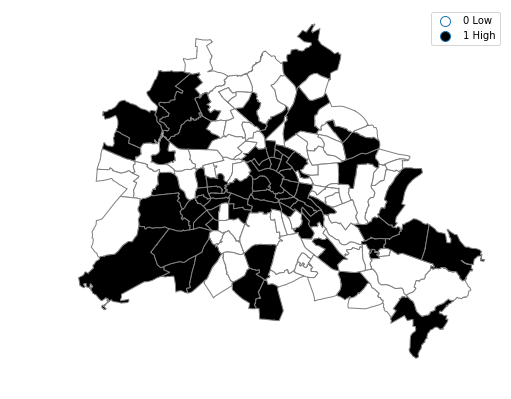

In [35]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)
ax.set_axis_off();

In [43]:
import esda

In [46]:
yb = 1 * (y > y.median())
wq = lp.weights.Queen.from_dataframe(df)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

In [47]:
jc.bb

121.0

In [48]:
jc.ww

114.0

In [49]:
jc.bw

150.0

In [50]:
jc.bb + jc.ww + jc.bw

385.0

In [51]:
wq.s0 / 2

385.0

In [52]:
jc.mean_bb

92.65365365365365

In [53]:
import seaborn as sbn

Text(0.5, 0, 'BB Counts')

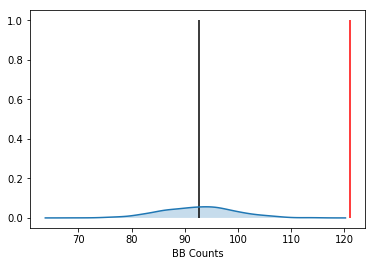

In [54]:
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 1, color='r')
plt.vlines(jc.mean_bb, 0, 1)
plt.xlabel('BB Counts')

In [55]:
jc.p_sim_bb

0.001

In [58]:
wq.transform = 'r'
y = df['median_price']
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.09946269199744258

Text(0.5, 0, "Moran's I")

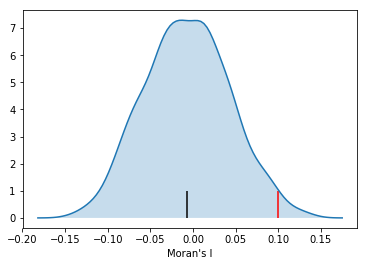

In [60]:
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0, 1)
plt.xlabel("Moran's I")

In [61]:
mi.p_sim

0.018

In [62]:
np.random.seed(12345)

In [64]:
wq.transform = 'r'
lag_price = lp.weights.lag_spatial(wq, df['median_price'])

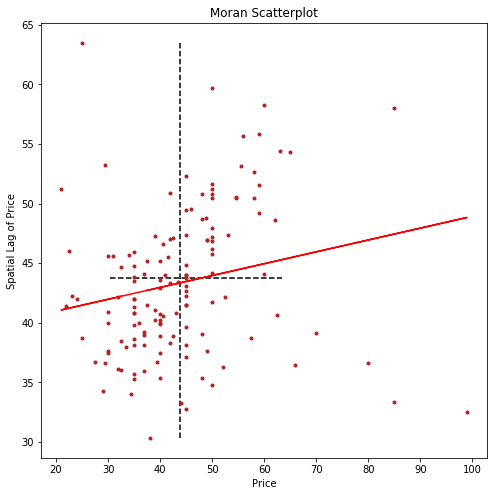

In [65]:
price = df['median_price']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(8,8))

plt.plot(price, lag_price, '.', color='firebrick')

plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
plt.hlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')

plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Price')
plt.xlabel('Price');

In [67]:
li = esda.moran.Moran_Local(y, wq)

In [68]:
li.q

array([2, 1, 1, 4, 2, 3, 2, 1, 3, 4, 3, 1, 3, 1, 1, 3, 3, 2, 3, 1, 1, 1,
       1, 2, 2, 3, 4, 4, 3, 4, 2, 3, 1, 1, 3, 1, 1, 1, 4, 4, 1, 1, 1, 1,
       2, 3, 3, 1, 2, 4, 3, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4, 2, 2,
       2, 4, 4, 3, 3, 4, 3, 4, 2, 4, 4, 1, 2, 1, 4, 3, 4, 2, 3, 3, 3, 3,
       3, 3, 4, 3, 4, 3, 4, 1, 1, 1, 3, 3, 1, 1, 1, 3, 4, 1, 4, 2, 3, 1,
       1, 2, 4, 2, 2, 2, 1, 1, 3, 3, 4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3])

In [69]:
(li.p_sim < 0.05).sum()

23

In [70]:
sig = li.p_sim < 0.05
hotspot = sig * li.q == 1
coldspot = sig * li.q == 3
doughnut = sig * li.q == 2
diamond = sig * li.q == 4

In [ ]:
from matplotlib import colors

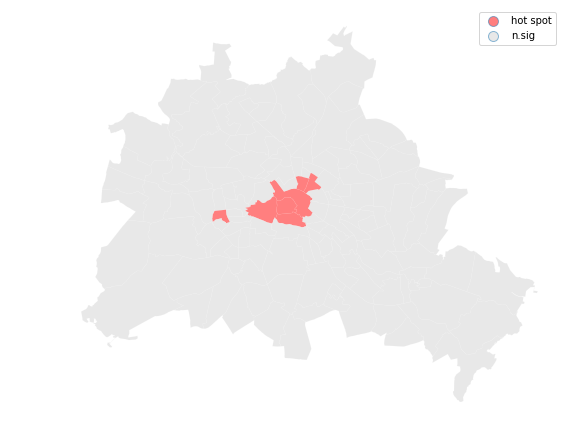

In [84]:
spots = ['n.sig', 'hot spot']
labels = [spots[i] for i in hotspot*1]

hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, k=2, cmap=hmap, linewidth=0.1, ax=ax, edgecolor='white', legend=True, alpha=.5)
ax.set_axis_off();

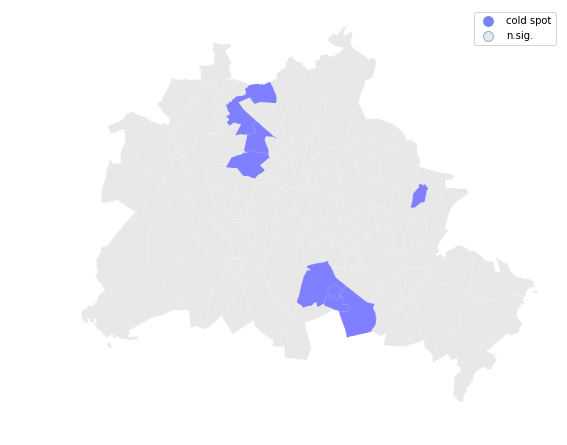

In [83]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, k=2, cmap=hmap, linewidth=0.1, ax=ax, edgecolor='white', legend=True, alpha=.5)
ax.set_axis_off();

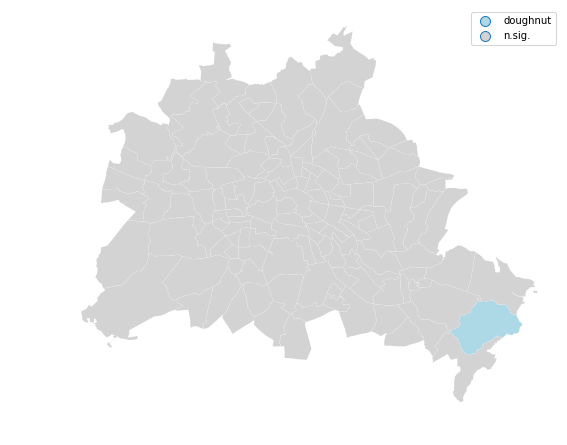

In [82]:
spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, k=2, cmap=hmap, linewidth=0.1, ax=ax, edgecolor='white', legend=True)
ax.set_axis_off();

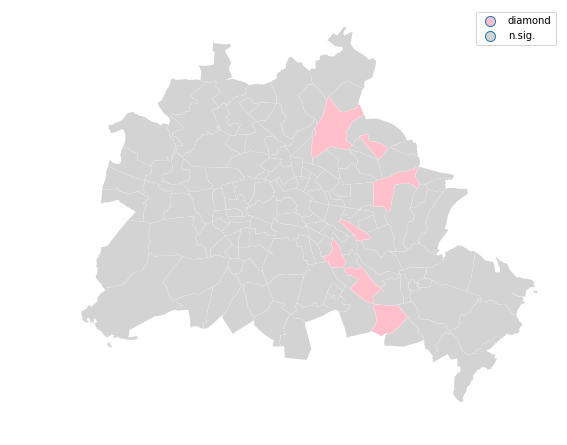

In [85]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, k=2, cmap=hmap, linewidth=0.1, ax=ax, edgecolor='white', legend=True)
ax.set_axis_off();

In [86]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 3, 1, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0])

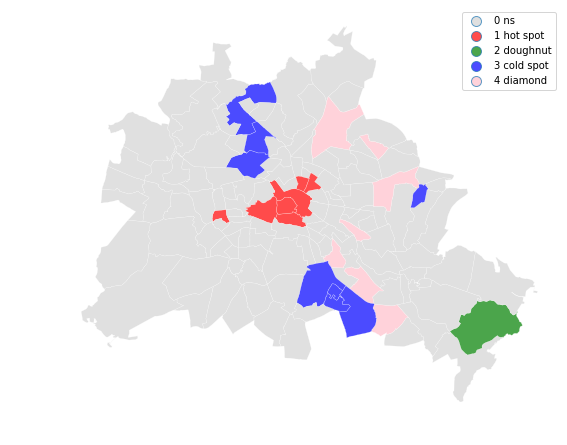

In [101]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

hmap = colors.ListedColormap([ 'lightgrey', 'red', 'green', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, k=2, cmap=hmap, linewidth=0.3, ax=ax, edgecolor='white', alpha=.7, legend=True,)
ax.set_axis_off();